# Exploratory Data Analysis II
#### This kernel is to summarize the data and decriptive statistics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
PATH_TO_DATA = 'data/predict_future_sales'
items = pd.read_csv(os.path.join(PATH_TO_DATA, 'items.csv'))
item_categories = pd.read_csv(os.path.join(PATH_TO_DATA, 'item_categories.csv'))
shops = pd.read_csv(os.path.join(PATH_TO_DATA, 'shops.csv'))
test = pd.read_csv(os.path.join(PATH_TO_DATA, 'test.csv'))
sample_submission = pd.read_csv(os.path.join(PATH_TO_DATA, 'sample_submission.csv'))
sales_train = pd.read_csv(os.path.join(PATH_TO_DATA, 'sales_train_v2.csv'))

In [4]:
# Our aim is to explore the train dataset
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [5]:
sales_train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [6]:
#Looks like there is no Missing data - NaNs in our train data set

In [38]:
#lets check for duplicate values
len(sales_train[sales_train.duplicated()])

6

In [10]:
#There are 6 duplicate rows , we will keep it as of now

In [11]:
#To keep the memory space allocated more than necessary, downcasting the datatypes to minimum requirements

In [4]:
def downcast_datatypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df
#converting float64 to float32 and int64,int32 to int16

In [5]:
sales_train = downcast_datatypes(sales_train)

In [6]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int16
shop_id           int16
item_id           int16
item_price        float32
item_cnt_day      float32
dtypes: float32(2), int16(3), object(1)
memory usage: 61.6+ MB


In [17]:
#Now we see that the memory usage: 134.4+ MB has come down to memory usage: 61.6+ MB

#### Lets Explore the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b50bfb358>,
      dtype=object)

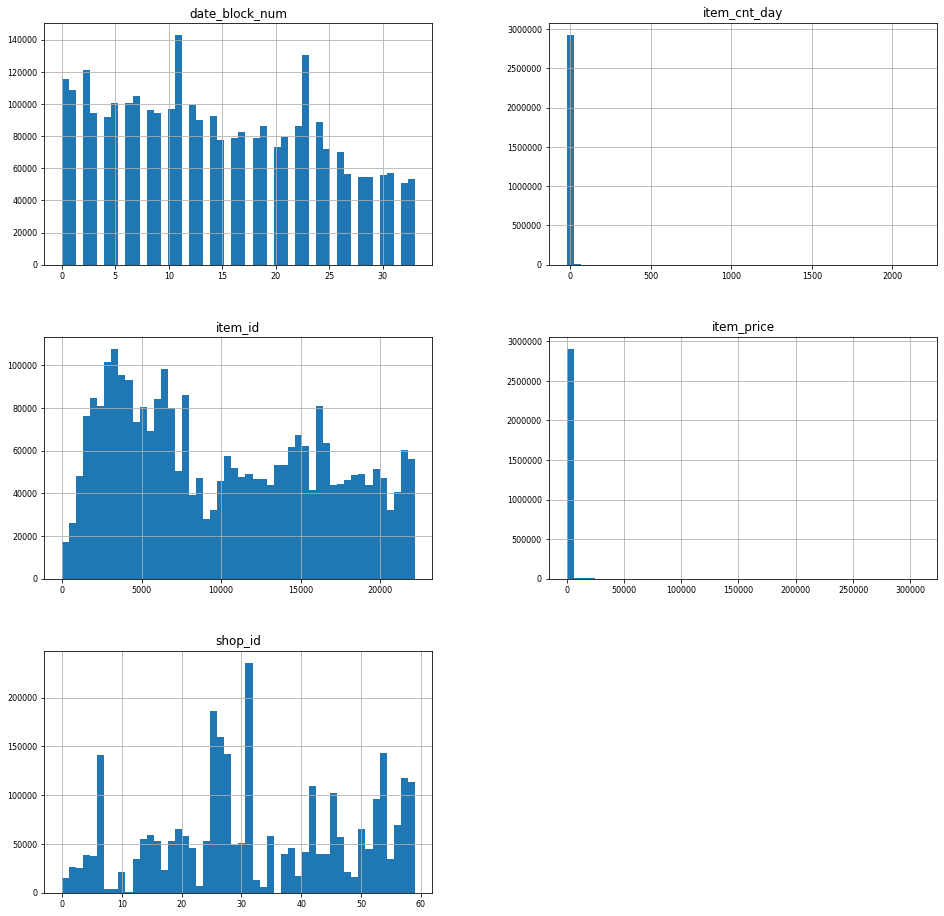

In [35]:
sales_train.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8) #freq vs features

In [36]:
#Lets check for outliers - Uni-variate outlier

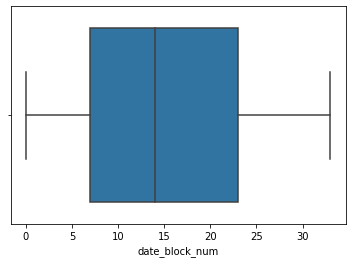

In [8]:
sns.boxplot(x=sales_train['date_block_num'])

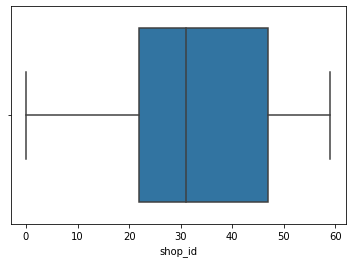

In [9]:
sns.boxplot(x=sales_train['shop_id'])

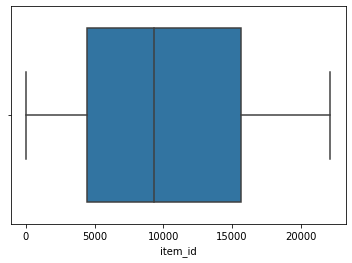

In [10]:
sns.boxplot(x=sales_train['item_id'])

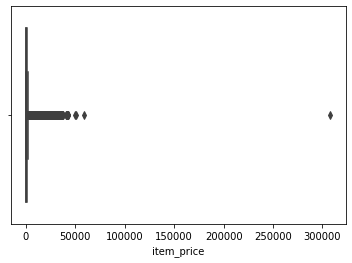

In [11]:
sns.boxplot(x=sales_train['item_price'])

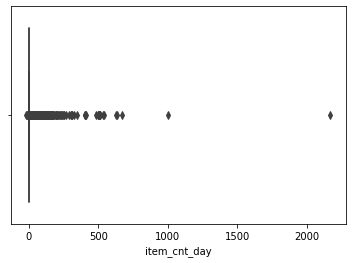

In [12]:
sns.boxplot(x=sales_train['item_cnt_day'])